In [1]:
# Import other modules not related to PySpark
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline


In [2]:
# Import PySpark related modules
import pyspark
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct, mean, regexp_replace, regexp_extract
from pyspark.sql.types import IntegerType, FloatType
from pyspark.sql.types import *



## Basic Pyspark Practics

In [3]:
MAX_MEMORY = '12G'
# Initialize a spark session.
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 100) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)
def init_spark():
    spark = SparkSession.builder.appName("Pyspark Practice").config(conf=conf).getOrCreate()
    return spark

spark = init_spark()


24/08/06 19:28:07 WARN Utils: Your hostname, Siddharths-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.0.112 instead (on interface en0)
24/08/06 19:28:07 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/06 19:28:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/08/06 19:28:08 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [5]:
data_filename = "/Users/siddharthagarwal/Desktop/spark_practice/endomondoHR.json"
df = spark.read.json(data_filename, mode="DROPMALFORMED")

In [6]:
df.show()

+--------------------+------+--------------------+---------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------+
|            altitude|gender|          heart_rate|       id|            latitude|           longitude|               speed|           sport|           timestamp|                 url|  userId|
+--------------------+------+--------------------+---------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------+
|[41.6, 40.6, 40.6...|  male|[100, 111, 120, 1...|396826535|[60.1733487658202...|[24.6497704088687...|[6.8652, 16.4736,...|            bike|[1408898746, 1408...|https://www.endom...|10921915|
|[38.4, 39.0, 39.0...|  male|[100, 105, 111, 1...|392337038|[60.1732475962489...|[24.6498552337288...|[9.0792, 13.284, ...|            bike|[1408221682, 1408...|https://www.endom...|10921915|
|[76.4, 73.2, 72.4...|  male|[99, 105, 1

In [7]:
print(df.printSchema())

root
 |-- altitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- gender: string (nullable = true)
 |-- heart_rate: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- id: long (nullable = true)
 |-- latitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- longitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- speed: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- sport: string (nullable = true)
 |-- timestamp: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- url: string (nullable = true)
 |-- userId: long (nullable = true)

None


In [8]:
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])


,Column Name,Data type
0,altitude,array<double>
1,gender,string
2,heart_rate,array<bigint>
3,id,bigint
4,latitude,array<double>
5,longitude,array<double>
6,speed,array<double>
7,sport,string
8,timestamp,array<bigint>
9,url,string


In [10]:
print('Data frame describe (string and numeric columns only):')
df.describe().toPandas()

print(f'There are total {df.count()} row, Let print first 2 data rows:')
df.limit(2).toPandas()

Data frame describe (string and numeric columns only):


24/08/06 19:31:38 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,summary,gender,id,sport,url,userId
0,count,253020,253020,253020,253020,253020
1,mean,None,3.566244412926132E8,None,None,4619648.939783417
2,stddev,None,1.574845634895318E8,None,None,3932877.7296880507
3,min,female,99296,aerobics,https://www.endomondo.com/users/10014612/worko...,69
4,max,unknown,674008008,yoga,https://www.endomondo.com/users/9991401/workou...,15481421


There are total 253020 row, Let print first 2 data rows:


,altitude,gender,heart_rate,id,latitude,longitude,speed,sport,timestamp,url,userId
0,"[41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....",male,"[100, 111, 120, 119, 120, 116, 125, 128, 131, ...",396826535,"[60.173348765820265, 60.173239801079035, 60.17...","[24.64977040886879, 24.65014273300767, 24.6509...","[6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...",bike,"[1408898746, 1408898754, 1408898765, 140889877...",https://www.endomondo.com/users/10921915/worko...,10921915
1,"[38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....",male,"[100, 105, 111, 110, 108, 115, 126, 130, 132, ...",392337038,"[60.173247596248984, 60.17320962622762, 60.172...","[24.649855233728886, 24.65015547350049, 24.650...","[9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...",bike,"[1408221682, 1408221687, 1408221699, 140822170...",https://www.endomondo.com/users/10921915/worko...,10921915


In [14]:
string_cols = ["gender", "sport", "url"]
numeric_cols = ['id','userId']
array_cols = ['altitude', 'heart_rate', 'latitude', 'longitude', 'speed', 'timestamp']

missing_values = {} 
for _, column in enumerate(df.columns):
    if column in string_cols:
        missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
    elif column in numeric_cols:
        missing_count = df.where(col(column).isin([None,np.nan])).count()
    else:
        missing_count = df.filter(array_contains(df[column], 0) | array_contains(df[column], np.nan)).count()
    
    missing_values.update({column:missing_count})
missing_df = pd.DataFrame.from_dict([missing_values])
missing_df


,altitude,gender,heart_rate,id,latitude,longitude,speed,sport,timestamp,url,userId
0,40848,0,1280,0,113,113,7741,0,0,0,0


In [15]:
df = df.withColumn('PerWorkoutRecordCount', size(col('timestamp')))

def user_activity_workout_summarize(df):
    user_count = format(df.select('userId').distinct().count(), 'd')
    workout_count = format(df.select('id').distinct().count(), ',d')
    activity_count = str(df.select('sport').distinct().count())
    sum_temp = df.agg(functions.sum('PerWorkoutRecordCount')).toPandas()
    total_records_count = format(sum_temp['sum(PerWorkoutRecordCount)'][0],',d')
    columns=['UserCount', 'ActivityTypesCount','WorkoutsCount', 'TotalRecordsCount']
    data = [[user_count], [activity_count], [workout_count], [total_records_count]]
    sum_dict = {column: data[i] for i, column in enumerate(columns)}
    sum_df = pd.DataFrame.from_dict(sum_dict)[columns]
    gender_user_count = df.select('gender','userId').distinct().groupBy('gender').count().toPandas()

    gender_activities_count = df.groupBy('gender').count().toPandas()
    gender_user_activity_count = gender_user_count.join(
        gender_activities_count.set_index('gender'), on='gender'
        , how='inner', lsuffix='_gu'
    )
    gender_user_activity_count.columns = ['Gender', '# of users', 'Activities (workouts) count']
    return sum_df, gender_user_activity_count

sum_dfs= user_activity_workout_summarize(df)
print('\nOverall data set summary on users, workouts and number of records (pre-filtering):')
sum_dfs[0]



Overall data set summary on users, workouts and number of records (pre-filtering):


,UserCount,ActivityTypesCount,WorkoutsCount,TotalRecordsCount
0,1104,49,"253,020","111,541,956"


In [17]:
print('Number of workouts that have less than 50 records and statistic summary:')
removed_df = df.select('PerWorkoutRecordCount').where(df.PerWorkoutRecordCount < 50) \
               .toPandas().describe().astype(int)
removed_df.rename(columns = {'PerWorkoutRecordCount': 'PerWorkoutRecordCount <50'}, inplace=True)
removed_df.T


Number of workouts that have less than 50 records and statistic summary:


,count,mean,std,min,25%,50%,75%,max
PerWorkoutRecordCount <50,5541,23,14,1,11,22,36,49


In [19]:
ranked_sports_user_df = df.select(df.sport, df.userId) \
    .distinct() \
    .groupBy(df.sport) \
    .count() \
    .orderBy("count", ascending=False)

highest_sport_users_df = ranked_sports_user_df.limit(5).toPandas()
# Rename column name : 'count' --> Users count
highest_sport_users_df.rename(columns = {'count':'Users count'}, inplace = True)
# Caculate the total users, we will this result to compute percentage later
total_sports_users = ranked_sports_user_df.groupBy().sum().collect()[0][0]


In [21]:
ranked_sports_user_df.collect()[:5]


[Row(sport='run', count=865),
 Row(sport='bike', count=794),
 Row(sport='mountain bike', count=336),
 Row(sport='bike (transport)', count=252),
 Row(sport='walk', count=209)]

24/08/06 22:28:43 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.rpc.RpcTimeoutException: Futures timed out after [100 milliseconds]. This timeout is controlled by spark.executor.heartbeatInterval
	at org.apache.spark.rpc.RpcTimeout.org$apache$spark$rpc$RpcTimeout$$createRpcTimeoutException(RpcTimeout.scala:47)
	at org.apache.spark.rpc.RpcTimeout$$anonfun$addMessageIfTimeout$1.applyOrElse(RpcTimeout.scala:62)
	at org.apache.spark.rpc.RpcTimeout$$anonfun$addMessageIfTimeout$1.applyOrElse(RpcTimeout.scala:58)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:76)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1219)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:2

Top 5 sports that have the most users participated:


,sport,Users count,percentage
0,run,865,25.130738
1,bike,794,23.067984
2,mountain bike,336,9.761766
3,bike (transport),252,7.321325
4,walk,209,6.072051
5,others,986,28.646136


/var/folders/59/mp1rbywx3cg4zv4qv2ycn7cc0000gn/T/ipykernel_32854/154942905.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  xsticks_label = axs[0].set_xticklabels(highest_sport_users_df_renamed['sport']


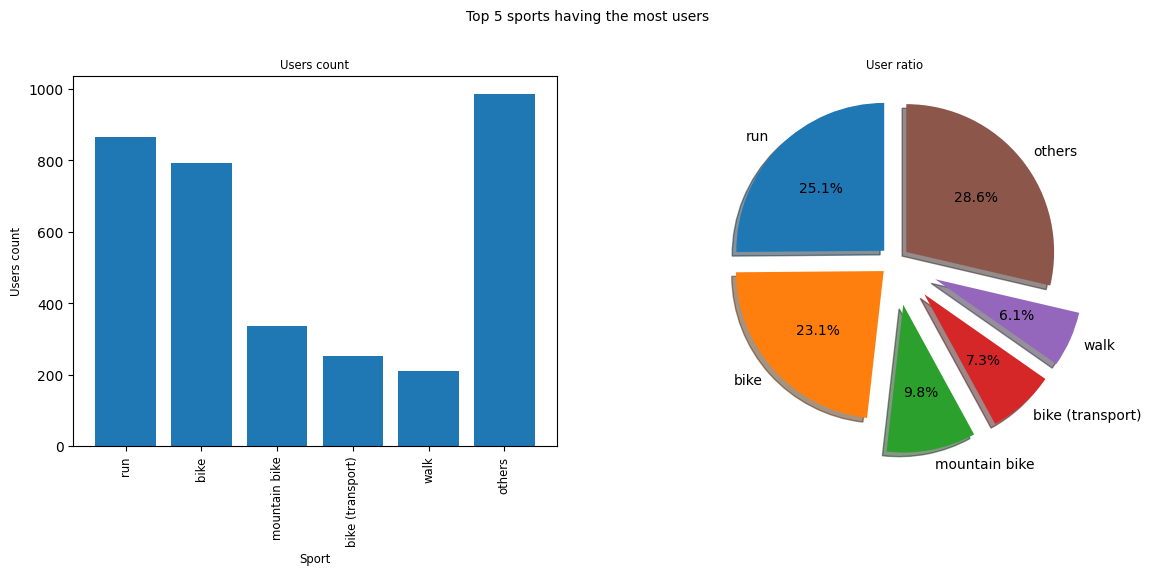

In [28]:
highest_sport_users_df_renamed = highest_sport_users_df
# Compute the percentage of top 5 workout type / total users
highest_sport_users_df_renamed['percentage'] = highest_sport_users_df['Users count'] \
    / total_sports_users * 100

others = {
      'sport': 'others'
    , 'Users count': total_sports_users - sum(highest_sport_users_df_renamed['Users count'])
    , 'percentage': 100 - sum(highest_sport_users_df_renamed['percentage'])
}


highest_sport_users_df_renamed = pd.concat([highest_sport_users_df_renamed, pd.DataFrame([others])], ignore_index=True)

print('Top 5 sports that have the most users participated:')
highest_sport_users_df_renamed

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.35))

plot0 =   axs[0].bar(x=highest_sport_users_df_renamed['sport']
                     , height=highest_sport_users_df_renamed['Users count'])
title0 =  axs[0].set_title('Users count', fontsize = 'small')
xlabel0 = axs[0].set_xlabel('Sport', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('Users count', fontsize = 'small')
xsticks_label = axs[0].set_xticklabels(highest_sport_users_df_renamed['sport'] 
                                       ,rotation = 'vertical', fontsize='small')
explode = (0.1, 0.1, 0.3, 0.3, 0.3, 0.1)
title1 = axs[1].set_title('User ratio', fontsize = 'small')
plot1 = axs[1].pie(
      x=highest_sport_users_df_renamed['percentage']
    , labels=highest_sport_users_df_renamed['sport']
    , autopct='%1.1f%%', shadow=True, explode=explode, startangle=90
    , radius=1
)

text = fig.text(0.5, 1.02, 'Top 5 sports having the most users', ha='center', va='top', transform=fig.transFigure)


In [29]:
activities_by_gender = df.groupBy('sport', 'gender').count().toPandas() 
activities_by_gender[:5]

,sport,gender,count
0,hiking,female,71
1,core stability training,male,1103
2,run,male,107882
3,kayaking,male,253
4,mountain bike,male,12782


In [32]:
df.columns

['altitude',
 'gender',
 'heart_rate',
 'id',
 'latitude',
 'longitude',
 'speed',
 'sport',
 'timestamp',
 'url',
 'userId',
 'PerWorkoutRecordCount']

In [39]:
array_mean = udf(lambda x: int(np.mean(x)), IntegerType())


df = df.withColumn('avg_heart_rate', array_mean(col('heart_rate')))

ranked_sports_avg_heartrate_df = df.select(df.avg_heart_rate, df.sport) \
    .distinct() \
    .groupBy(df.sport) \
    .count() \
    .orderBy("count", ascending=False)
ranked_sports_avg_heartrate_df.show()

+--------------------+-----+
|               sport|count|
+--------------------+-----+
|                 run|  206|
|                bike|  182|
|       mountain bike|  131|
|core stability tr...|  129|
|    bike (transport)|  122|
|                walk|  110|
|      indoor cycling|  102|
|               skate|  101|
|        orienteering|   95|
|cross-country skiing|   87|
|     fitness walking|   84|
|              hiking|   79|
|            kayaking|   79|
|    circuit training|   75|
|     weight training|   73|
|       roller skiing|   73|
|     downhill skiing|   72|
|              rowing|   61|
|          gymnastics|   59|
|          elliptical|   40|
+--------------------+-----+
only showing top 20 rows



In [43]:
highest_sport_heartrate_df = ranked_sports_avg_heartrate_df.limit(20).toPandas()
print('Top 5 sports that have the most users participated:')
highest_sport_heartrate_df



Top 5 sports that have the most users participated:


,sport,count
0,run,206
1,bike,182
2,mountain bike,131
3,core stability training,129
4,bike (transport),122
5,walk,110
6,indoor cycling,102
7,skate,101
8,orienteering,95
9,cross-country skiing,87


/var/folders/59/mp1rbywx3cg4zv4qv2ycn7cc0000gn/T/ipykernel_32854/549652306.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  xsticks_label = axs.set_xticklabels(highest_sport_heartrate_df['sport']


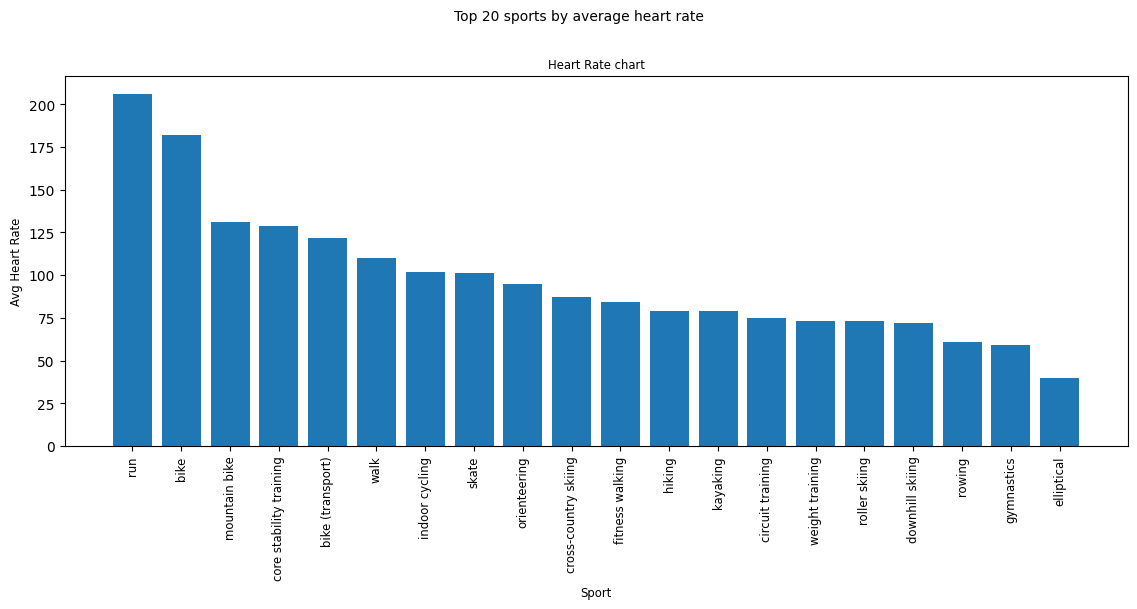

24/08/07 11:16:14 WARN NettyRpcEnv: Ignored failure: java.util.concurrent.TimeoutException: Cannot receive any reply from 192.168.0.112:61529 in 100 milliseconds
24/08/07 11:16:14 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.rpc.RpcTimeoutException: Futures timed out after [100 milliseconds]. This timeout is controlled by spark.executor.heartbeatInterval
	at org.apache.spark.rpc.RpcTimeout.org$apache$spark$rpc$RpcTimeout$$createRpcTimeoutException(RpcTimeout.scala:47)
	at org.apache.spark.rpc.RpcTimeout$$anonfun$addMessageIfTimeout$1.applyOrElse(RpcTimeout.scala:62)
	at org.apache.spark.rpc.RpcTimeout$$anonfun$addMessageIfTimeout$1.applyOrElse(RpcTimeout.scala:58)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:76)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scal

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=plt.figaspect(0.35))

plot0 =   axs.bar(x=highest_sport_heartrate_df['sport']
                     , height=highest_sport_heartrate_df['count'])
title0 =  axs.set_title('Heart Rate chart', fontsize = 'small')
xlabel0 = axs.set_xlabel('Sport', fontsize = 'small')
ylabel0 = axs.set_ylabel('Avg Heart Rate', fontsize = 'small')
xsticks_label = axs.set_xticklabels(highest_sport_heartrate_df['sport'] 
                                       ,rotation = 'vertical', fontsize='small')


text = fig.text(0.5, 1.02, 'Top 20 sports by average heart rate', ha='center', va='top', transform=fig.transFigure)


## Getting to know Amazon Books

In [3]:
MAX_MEMORY = '12G'
# Initialize a spark session.
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 10000) \
        .set('spark.network.timeout', 100000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.maxResultSize", '2G') 
def init_spark():
    spark = SparkSession.builder.appName("Getting to know Amazon Books").config(conf=conf).getOrCreate()
    return spark

spark = init_spark()


24/08/18 17:45:32 WARN Utils: Your hostname, Siddharths-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.0.112 instead (on interface en0)
24/08/18 17:45:32 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/18 17:45:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
data_filename = "/Users/siddharthagarwal/Desktop/amazon_book_review/data/Books_5.json"
metadata_filename = "/Users/siddharthagarwal/Desktop/amazon_book_review/data/meta_Books.json"
data_df = spark.read.json(data_filename, mode="DROPMALFORMED")
metadata_df = spark.read.json(metadata_filename, mode="DROPMALFORMED")

24/08/18 17:45:48 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
24/08/18 17:46:07 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [5]:
data_df.show()

+----------+-----+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------------+--------------+--------+----+
|      asin|image|overall|          reviewText| reviewTime|    reviewerID|        reviewerName|               style|             summary|unixReviewTime|verified|vote|
+----------+-----+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------------+--------------+--------+----+
|0001713353| NULL|    5.0|The King, the Mic...|03 30, 2005|A1REUF3A1YCPHM|         TW Ervin II|{NULL,  Hardcover...|A story children ...|    1112140800|   false|NULL|
|0001713353| NULL|    5.0|  The kids loved it!|06 20, 2016| AVP0HXC9FG790|     Amazon Customer|                NULL|          Five Stars|    1466380800|    true|NULL|
|0001713353| NULL|    5.0|My students (3 & ...|01 24, 2016|A324TTUBKTN73A|        Tekla Borner|{NULL,  Paperback...|          Five Stars|    1453593600|    true|NULL

In [6]:
metadata_df.show()

+--------------------+--------------------+----------+--------------------+--------------------+----+--------------------+-------+-------+---+--------+---------------+--------+-------+--------------------+------------+-----+-----+--------------------+
|            also_buy|           also_view|      asin|               brand|            category|date|         description|details|feature|fit|imageURL|imageURLHighRes|main_cat|  price|                rank|similar_item|tech1|tech2|               title|
+--------------------+--------------------+----------+--------------------+--------------------+----+--------------------+-------+-------+---+--------+---------------+--------+-------+--------------------+------------+-----+-----+--------------------+
|[0669009075, B000...|[0019777701, B000...|0000092878|        Keith Graham|                  []|    |[It is a biology ...|   NULL|     []|   |      []|             []|   Books| $39.94|1,349,781 in Books (|            |     |     |Biology Gods L

In [7]:
filtered_data_df = data_df.filter(
    col("reviewText").isNotNull() & 
    col("asin").isNotNull() & 
    col("unixReviewTime").isNotNull() & 
    col("overall").isNotNull() 
)

filtered_data_df = filtered_data_df.filter(
    col("reviewText")!= '')

print(filtered_data_df.count())

27161262


In [8]:
asins = filtered_data_df.select("asin").distinct().rdd.flatMap(lambda x: x).collect()

In [9]:
len(asins)

704093

In [9]:
metadata_df.printSchema()

root
 |-- also_buy: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- also_view: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- asin: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- category: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- date: string (nullable = true)
 |-- description: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- details: struct (nullable = true)
 |    |-- \n    Item Weight: \n    : string (nullable = true)
 |    |-- \n    Package Dimensions: \n    : string (nullable = true)
 |    |-- \n    Product Dimensions: \n    : string (nullable = true)
 |    |--  Date first listed on Amazon:: string (nullable = true)
 |    |-- 3.5" and 5.25" disks:: string (nullable = true)
 |    |-- 3.5" disk:: string (nullable = true)
 |    |-- 5.25" disk:: string (nullable = true)
 |    |-- ASIN:: string (nullable = true)
 |    |-- ASIN: : string (nullable

In [57]:
filtered_metadata_df = metadata_df.withColumn(
    "brand",
    regexp_extract(col("brand"), r"^Visit Amazon's(.*?) Page$", 1)
)
filtered_metadata_df = filtered_metadata_df.filter(
    col("price")!= '')
filtered_metadata_df = filtered_metadata_df.filter(
    col("brand")!= '')
filtered_metadata_df = filtered_metadata_df.withColumn(
    "price (USD)",
    regexp_replace(col("price"), r'^\$', '').cast("float")
)

filtered_metadata_df = filtered_metadata_df.filter(
    col("brand").isNotNull() & 
    col("asin").isNotNull() & 
    col("title").isNotNull() &
    col("price").isNotNull())


print(filtered_metadata_df.count())

957838


In [58]:
filtered_metadata_df.show()

+--------------------+--------------------+----------+--------------------+--------------------+----+--------------------+-------+-------+---+--------+---------------+--------+-------+--------------------+------------+-----+-----+--------------------+-----------+
|            also_buy|           also_view|      asin|               brand|            category|date|         description|details|feature|fit|imageURL|imageURLHighRes|main_cat|  price|                rank|similar_item|tech1|tech2|               title|price (USD)|
+--------------------+--------------------+----------+--------------------+--------------------+----+--------------------+-------+-------+---+--------+---------------+--------+-------+--------------------+------------+-----+-----+--------------------+-----------+
|                  []|[0743484924, 0743...|0001050230| William Shakespeare|[Books, Literatur...|    |[William Shakespe...|   NULL|     []|   |      []|             []|   Books| $20.93|11,922,808 in Boo...|   

In [59]:
brands = filtered_metadata_df.select('brand').distinct()

In [60]:
brands_df = brands.toPandas()

In [61]:
len(brands_df)

412967

In [66]:
filtered_brand = brands_df[brands_df['brand'].str.contains('George R.R.')]


In [67]:
filtered_brand

,brand
663,George R.R. Martin
60483,George R R Martin
181748,George R.R. Washington
355403,George R.R Martin


24/08/10 23:12:35 WARN NettyRpcEnv: Ignored failure: java.util.concurrent.TimeoutException: Cannot receive any reply from 192.168.0.112:60703 in 100 milliseconds
24/08/10 23:12:35 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.rpc.RpcTimeoutException: Futures timed out after [100 milliseconds]. This timeout is controlled by spark.executor.heartbeatInterval
	at org.apache.spark.rpc.RpcTimeout.org$apache$spark$rpc$RpcTimeout$$createRpcTimeoutException(RpcTimeout.scala:47)
	at org.apache.spark.rpc.RpcTimeout$$anonfun$addMessageIfTimeout$1.applyOrElse(RpcTimeout.scala:62)
	at org.apache.spark.rpc.RpcTimeout$$anonfun$addMessageIfTimeout$1.applyOrElse(RpcTimeout.scala:58)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:76)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scal

In [14]:
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.clustering import LDA
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF


tokenizer = Tokenizer(inputCol="reviewText", outputCol="words")
words_data = tokenizer.transform(filtered_data_df)


In [15]:
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
filtered_data = remover.transform(words_data)

# Convert the text data to count vectors
cv = CountVectorizer(inputCol="filtered", outputCol="features", vocabSize=10000, minDF=5.0)
cv_model = cv.fit(filtered_data)
cv_data = cv_model.transform(filtered_data)



In [16]:
lda = LDA(k=10, maxIter=10)
lda_model = lda.fit(cv_data)




24/08/14 15:55:33 WARN MemoryStore: Not enough space to cache rdd_51_0 in memory! (computed 51.8 MiB so far)
24/08/14 15:55:33 WARN BlockManager: Persisting block rdd_51_0 to disk instead.
24/08/14 15:55:33 WARN MemoryStore: Not enough space to cache rdd_51_6 in memory! (computed 47.1 MiB so far)
24/08/14 15:55:33 WARN BlockManager: Persisting block rdd_51_6 to disk instead.
24/08/14 15:55:33 WARN MemoryStore: Not enough space to cache rdd_51_2 in memory! (computed 42.1 MiB so far)
24/08/14 15:55:33 WARN BlockManager: Persisting block rdd_51_2 to disk instead.
24/08/14 15:55:37 WARN MemoryStore: Not enough space to cache rdd_51_1 in memory! (computed 71.5 MiB so far)
24/08/14 15:55:37 WARN BlockManager: Persisting block rdd_51_1 to disk instead.
24/08/14 15:55:40 WARN MemoryStore: Not enough space to cache rdd_51_1 in memory! (computed 31.5 MiB so far)
24/08/14 15:55:40 WARN MemoryStore: Not enough space to cache rdd_51_0 in memory! (computed 34.5 MiB so far)
24/08/14 15:55:41 WARN Mem

In [17]:
topics = lda_model.describeTopics(10)

In [18]:
topics

DataFrame[topic: int, termIndices: array<int>, termWeights: array<double>]

In [19]:
transformed = lda_model.transform(cv_data)
transformed.select("reviewText", "topicDistribution").show()


+--------------------+--------------------+
|          reviewText|   topicDistribution|
+--------------------+--------------------+
|The King, the Mic...|[0.27118980462950...|
|  The kids loved it!|[0.23001234837282...|
|My students (3 & ...|[0.00938063039915...|
|             LOVE IT|[0.04795805841380...|
|              Great!|[0.04795387215804...|
|Over and over the...|[0.00137316743617...|
|I remember readin...|[0.53625556912944...|
|I am very happy w...|[0.41707363349146...|
|My copy is so tat...|[0.00624257050059...|
|This was one of m...|[0.00938179876546...|
|So, you think you...|[0.00301495267309...|
|My mom bought thi...|[0.00239560699521...|
|41 years later:\n...|[0.00333859574104...|
|One of the best b...|[0.33247669305552...|
|Finally back in p...|[0.00624248062658...|
|To summarize the ...|[0.00176215418882...|
|I was given this ...|[0.00274848225607...|
|I had this book a...|[0.00938132886084...|
|My aunt bought me...|[0.00153088855727...|
|I agree with anot...|[0.3927341

In [21]:
vocab = cv_model.vocabulary
# Describe topics
topics = lda_model.describeTopics(20)
topics.show()

def topic_words(topic, vocab):
    return [vocab[word_idx] for word_idx in topic]

topics_with_words = topics.rdd \
    .map(lambda row: (row['topic'], topic_words(row['termIndices'], vocab))) \
    .collect()

for topic_num, words in topics_with_words:
    print(f"Topic {topic_num}: {', '.join(words)}")


+-----+--------------------+--------------------+
|topic|         termIndices|         termWeights|
+-----+--------------------+--------------------+
|    0|[1, 0, 3, 5, 15, ...|[0.03045771474610...|
|    1|[0, 1, 3, 5, 4, 2...|[0.16368057617414...|
|    2|[1, 0, 6, 2, 4, 5...|[0.01994593628156...|
|    3|[0, 1, 8, 2, 7, 1...|[0.05485544671501...|
|    4|[0, 1, 2, 7, 4, 6...|[0.03826109162845...|
|    5|[0, 1, 4, 3, 28, ...|[0.12120263577833...|
|    6|[0, 1, 2, 5, 3, 8...|[0.08422341231681...|
|    7|[1, 0, 4, 3, 17, ...|[0.01975267637588...|
|    8|[0, 3, 4, 1, 29, ...|[0.01507951934954...|
|    9|[0, 1, 3, 2, 5, 1...|[0.04607198258788...|
+-----+--------------------+--------------------+

Topic 0: book, , one, like, books, read, great, love, little, really, many, best, much, make, also, book., know, way, use, story
Topic 1: , book, one, like, story, read, -, characters, well, many, even, really, two, good, first, series, love, get, much, character
Topic 2: book, , love, read, story,

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [12]:
analyzer = SentimentIntensityAnalyzer()
first_record = filtered_data_df.first()['reviewText']
first_record

"The King, the Mice and the Cheese by Nancy Gurney is an excellent children's book.  It is one that I well remember from my own childhood and purchased for my daughter who loves it.\n\nIt is about a king who has trouble with rude mice eating his cheese. He consults his wise men and they suggest cats to chase away the mice. The cats become a nuisance, so the wise men recommend the king bring in dogs to chase the cats away.  The cycle goes on until the mice are finally brought back to chase away the elephants, brought in to chase away the lions that'd chased away the dogs.\n\nThe story ends in compromise and friendship between the mice and the king.  The story also teaches cause and effect relationships.\n\nThe pictures that accompany the story are humorous and memorable.  I was thrilled to discover that it is back in print.  I *highly* recommend it for children ages 2 to 7."

In [19]:
@udf
def analyze_sentiment(text):
    if text is None:
        return 0.0  # handle nulls gracefully
    score = analyzer.polarity_scores(text)['compound']
    return float(score)



In [21]:
filtered_data_df = filtered_data_df.withColumn("sentiment_score", analyze_sentiment(filtered_data_df['reviewText']))


In [22]:
filtered_data_df.show()

+----------+-----+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------------+--------------+--------+----+---------------+
|      asin|image|overall|          reviewText| reviewTime|    reviewerID|        reviewerName|               style|             summary|unixReviewTime|verified|vote|sentiment_score|
+----------+-----+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------------+--------------+--------+----+---------------+
|0001713353| NULL|    5.0|The King, the Mic...|03 30, 2005|A1REUF3A1YCPHM|         TW Ervin II|{NULL,  Hardcover...|A story children ...|    1112140800|   false|NULL|         0.9718|
|0001713353| NULL|    5.0|  The kids loved it!|06 20, 2016| AVP0HXC9FG790|     Amazon Customer|                NULL|          Five Stars|    1466380800|    true|NULL|          0.636|
|0001713353| NULL|    5.0|My students (3 & ...|01 24, 2016|A324TTUBKTN73A|        Tek